In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [61]:
dataset = pd.read_csv('./files/dataset.csv')

dataset.head()

,Feature Model,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Flexibility of Configuration,Single Cylic Dependent Features,Multiple Cyclic Dependent Features,Number of Features Referenced in Constraints Mean,Ratio of Variability,Number of Valid Configurations,Number of Groups OR,Number of Groups XOR,Maintainability
0,RaaS,32,2,19,28,3,3,28,0.531250,0,0,0.0,4.857143,125829120.0,3,0,moderate
1,AvionFEatures,10,4,5,7,3,2,7,0.100000,0,0,0.0,2.200000,12.0,2,0,verygood
2,Bike Shop,21,3,5,15,5,5,27,0.095238,9,3,0.0,2.272727,70.0,1,4,good
3,Jetbrains,33,13,3,25,4,2,28,0.272727,3,0,2.0,3.400000,4884.0,0,2,moderate
4,Ubuntu,11,3,4,7,3,3,7,0.090909,0,0,1.0,1.857143,12.0,0,3,verygood


In [62]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [63]:
scaler = StandardScaler()
clf = LogisticRegression(random_state=0)
pipeline = make_pipeline(scaler, clf)
pipeline.fit(X, y)

scores = cross_val_score(pipeline, X, y, cv=10)

print("Scores:", scores_accuracy)
print("Min:", np.min(scores_accuracy))
print("Max:", np.max(scores_accuracy))
print("Mean:", np.mean(scores_accuracy))
print("Standard Deviation:", np.std(scores_accuracy))

Scores: [0.71428571 0.62857143 0.55882353 0.67647059 0.67647059 0.67647059
 0.61764706 0.61764706 0.67647059 0.67647059]
Min: 0.5588235294117647
Max: 0.7142857142857143
Mean: 0.6519327731092438
Standard Deviation: 0.04297035631438475


In [64]:
select_from_model = SelectFromModel(clf, prefit=True)

print(X.columns[select_from_model.get_support()])

Index(['Number of Features', 'Number of Mandatory Features',
       'Number of Top Features', 'Number of Leaf Features',
       ' Depth of Tree Max', 'Cognitive Complexity of Feature Model',
       'Feature Extensibility', 'Number of Groups OR'],
      dtype='object')


In [68]:
# X = dataset.iloc[:, [1, 2, 4, 5, 6, 7, 14, 15]] # Correlation
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 14]] # Select From Model

X.head()

,Number of Features,Number of Mandatory Features,Number of Top Features,Number of Leaf Features,Depth of Tree Max,Cognitive Complexity of Feature Model,Feature Extensibility,Number of Groups OR
0,32,2,19,28,3,3,28,3
1,10,4,5,7,3,2,7,2
2,21,3,5,15,5,5,27,1
3,33,13,3,25,4,2,28,0
4,11,3,4,7,3,3,7,0


In [66]:
scaler = StandardScaler()
clf = LogisticRegression(random_state=0)
pipeline = make_pipeline(scaler, clf)
pipeline.fit(X, y)

scores_accuracy = cross_val_score(pipeline, X, y, cv=10)

print("\n>> Accuracy")
print("Scores:", scores_accuracy)
print("Min:", np.min(scores_accuracy))
print("Max:", np.max(scores_accuracy))
print("Mean:", np.mean(scores_accuracy))
print("Standard Deviation:", np.std(scores_accuracy))

scores_precision = cross_val_score(pipeline, X, y, cv=10, scoring="precision_micro")

print("\n>> Precision")
print("Scores:", scores_precision)
print("Min:", np.min(scores_precision))
print("Max:", np.max(scores_precision))
print("Mean:", np.mean(scores_precision))
print("Standard Deviation:", np.std(scores_precision))

scores_recall = cross_val_score(pipeline, X, y, cv=10, scoring="recall_weighted")

print("\n>> Recall")
print("Scores:", scores_recall)
print("Min:", np.min(scores_recall))
print("Max:", np.max(scores_recall))
print("Mean:", np.mean(scores_recall))
print("Standard Deviation:", np.std(scores_recall))

scores_f1 = cross_val_score(pipeline, X, y, cv=10, scoring="f1_weighted")

print("\n>> F1")
print("Scores:", scores_f1)
print("Min:", np.min(scores_f1))
print("Max:", np.max(scores_f1))
print("Mean:", np.mean(scores_f1))
print("Standard Deviation:", np.std(scores_f1))

scores_roc_auc = cross_val_score(pipeline, X, y, cv=10, scoring="roc_auc_ovo_weighted")

print("\n>> ROC_AUC")
print("Scores:", scores_roc_auc)
print("Min:", np.min(scores_roc_auc))
print("Max:", np.max(scores_roc_auc))
print("Mean:", np.mean(scores_roc_auc))
print("Standard Deviation:", np.std(scores_roc_auc))


>> Accuracy
Scores: [0.71428571 0.62857143 0.55882353 0.67647059 0.67647059 0.67647059
 0.61764706 0.61764706 0.67647059 0.67647059]
Min: 0.5588235294117647
Max: 0.7142857142857143
Mean: 0.6519327731092438
Standard Deviation: 0.04297035631438475

>> Precision
Scores: [0.71428571 0.62857143 0.55882353 0.67647059 0.67647059 0.67647059
 0.61764706 0.61764706 0.67647059 0.67647059]
Min: 0.5588235294117647
Max: 0.7142857142857143
Mean: 0.6519327731092438
Standard Deviation: 0.04297035631438475

>> Recall
Scores: [0.71428571 0.62857143 0.55882353 0.67647059 0.67647059 0.67647059
 0.61764706 0.61764706 0.67647059 0.67647059]
Min: 0.5588235294117647
Max: 0.7142857142857143
Mean: 0.6519327731092438
Standard Deviation: 0.04297035631438475

>> F1
Scores: [0.66878752 0.58687544 0.52452776 0.67022642 0.6503268  0.63678805
 0.59084967 0.57468531 0.62829707 0.66106443]
Min: 0.5245277598218775
Max: 0.6702264239028946
Mean: 0.6192428460944895
Standard Deviation: 0.04579215193368355

>> ROC_AUC
Scores:

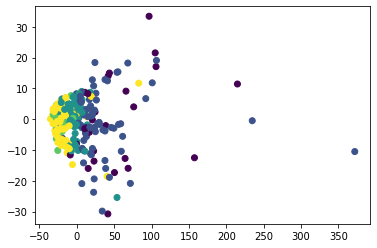

In [67]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_ = pca.transform(X)

class_colors = {
    'verybad': 0,
    'bad': 1,
    'moderate': 2,
    'good': 3,
    'verygood': 4
}
y_colors = [class_colors[i] for i in y]

plt.scatter(X_[:, 0], X_[:, 1], c=y_colors)
plt.show()